In [4]:
#Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Using pandas to low the raw data
df = pd.read_csv(r"C:\Users\Apelu\OneDrive\Desktop\Wine Property FlipRoboProject_1\winequality-red.csv")


In [69]:
# First five rows 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [70]:
# The last five rows
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [71]:
# Displaying variable in the data set 
column_count = df.columns
total_variable = len(column_count)
print(column_count)
total_variable

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


12

In [11]:
# Identifying and categorising data type
categorical_df = [] 
for item in df.dtypes.index:
    if df.dtypes[item] == 'O':
        categorical_df.append(item)
print('Categorical',categorical_df)
numeric_data = []
for items in df.dtypes.index:
    if df.dtypes[items] == 'int64' or df.dtypes[items] == 'float64':
        numeric_data.append(items)
print('Numeric',numeric_data)

Categorical []
Numeric ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


There is absent of categorical column in the dataset (df)

In [12]:
# Navigating missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
# Checking all entry
df.isnull().count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [14]:
df['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [15]:
# Collecting information on each variable explicitly by describing its statistics
df.describe(include = "all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
# Acknowledging the unique value in each column of the dataset
df.nunique().to_frame("Unique Values")

,Unique Values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


EXPLORATORY DATA ANALYSIS

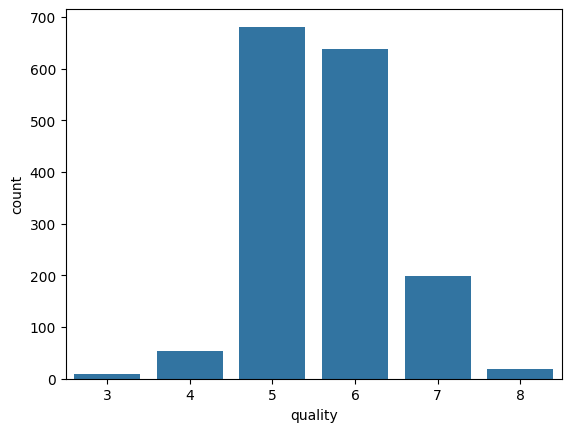

In [17]:
# Visualizing quality frequency
ax = sns.countplot(x = 'quality', data = df[numeric_data])

0.21780157547366327


<Axes: xlabel='quality', ylabel='Density'>

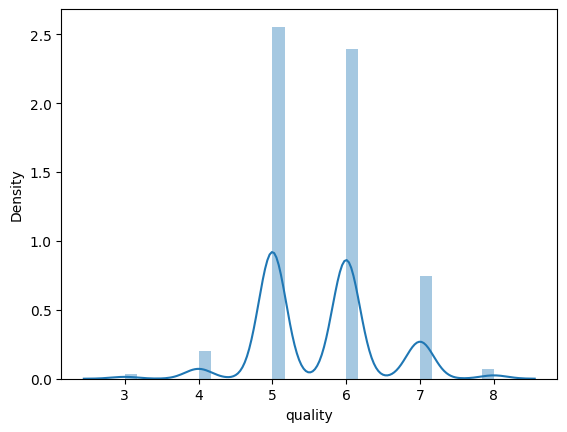

In [14]:
# Visualizing skewness and quality frequency
print(df['quality'].skew())
sns.distplot(df['quality'],kde = True)

In [18]:
# # Verifying data skewness
skewness_value = df[['fixed acidity','volatile acidity','citric acid','density', 'pH', 'free sulfur dioxide','total sulfur dioxide','chlorides','sulphates','alcohol','residual sugar']].skew()
print(skewness_value)
    

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
density                 0.071288
pH                      0.193683
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
chlorides               5.680347
sulphates               2.428672
alcohol                 0.860829
residual sugar          4.540655
dtype: float64


NOTE 1

The dataset exhibits varying degrees of positive skewness in its wine-related variables, such as fixed acidity, volatile acidity, and chlorides.
Notably, chlorides and residual sugar display pronounced rightward skewness, suggesting the prevalence of higher concentrations.
Other attributes, like citric acid and density, exhibit milder positive skewness.
The data appears to have a mix of symmetrical and positively skewed distributions. While some variables, like density and pH,
show relatively balanced distributions, others, such as chlorides and residual sugar, exhibit pronounced positive skewness, 
indicating asymmetry with longer tails on the right side.
Therefore, Preprocessing techniques, (log transformations or scaling) will be applied to mitigate skewness and enhance ML model robustness,
improving prediction accuracy. 

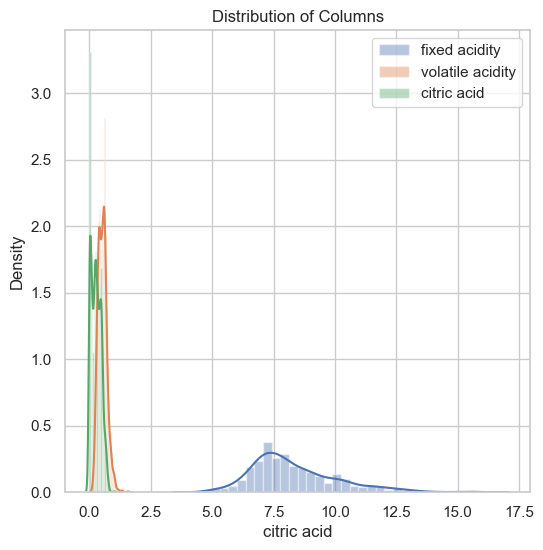

In [19]:
# Creating distribution plot for fixed acidity,volatile acidity and citric acid. Refer to NOTE 1 for an explanation
sns.set(style = 'whitegrid')
plt.figure(figsize = (6,6))

acidic_list = ['fixed acidity','volatile acidity','citric acid']
for columns in acidic_list:
    sns.distplot(df[columns], kde = True, label = columns)

plt.legend()
plt.title('Distribution of Columns')
plt.show()

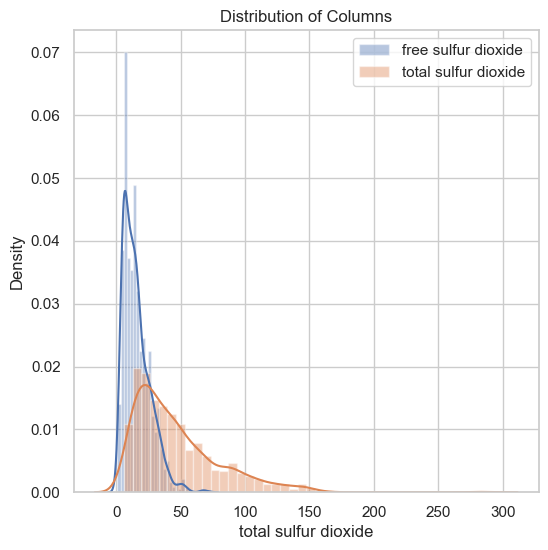

In [14]:
# Creating distribution plot. Refer to NOTE 1 for an explanation
sns.set(style = 'whitegrid')
plt.figure(figsize = (6,6))

dioxide_list = ['free sulfur dioxide','total sulfur dioxide']
for columns in dioxide_list:
    sns.distplot(df[columns], kde = True, label = columns)

plt.legend()
plt.title('Distribution of Columns')
plt.show()

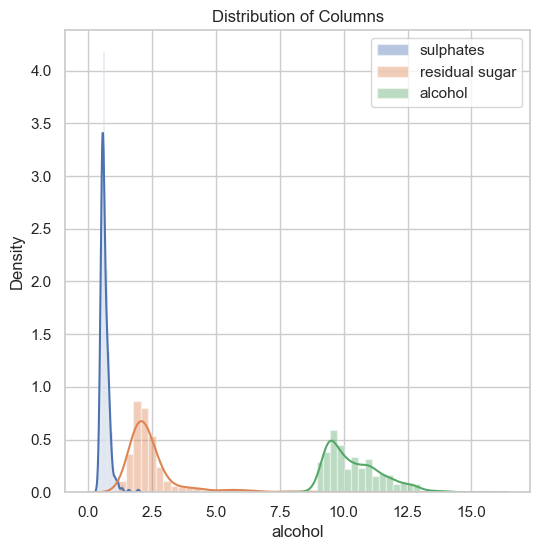

In [15]:
# Creating distribution plot. Refer to NOTE 1 for an explanation
sns.set(style = 'whitegrid')
plt.figure(figsize = (6,6))

other_list = ['sulphates','residual sugar', 'alcohol']
for columns in other_list:
    sns.distplot(df[columns], kde = True, label = columns)

plt.legend()
plt.title('Distribution of Columns')
plt.show()

<Axes: xlabel='alcohol', ylabel='Density'>

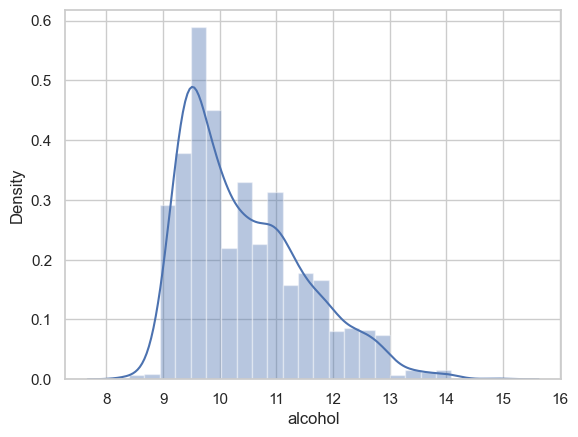

In [41]:
# Creating a simple plot. Refer to NOTE 1 for an explanation
sns.distplot(df['alcohol'], kde = True)

In [20]:
# Describing all the variable unique summary
df[['fixed acidity','volatile acidity','citric acid','density', 'pH', 'free sulfur dioxide','total sulfur dioxide','chlorides','sulphates','alcohol','residual sugar']].describe()

,fixed acidity,volatile acidity,citric acid,density,pH,free sulfur dioxide,total sulfur dioxide,chlorides,sulphates,alcohol,residual sugar
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,0.996747,3.311113,15.874922,46.467792,0.087467,0.658149,10.422983,2.538806
std,1.741096,0.179060,0.194801,0.001887,0.154386,10.460157,32.895324,0.047065,0.169507,1.065668,1.409928
min,4.600000,0.120000,0.000000,0.990070,2.740000,1.000000,6.000000,0.012000,0.330000,8.400000,0.900000
25%,7.100000,0.390000,0.090000,0.995600,3.210000,7.000000,22.000000,0.070000,0.550000,9.500000,1.900000
50%,7.900000,0.520000,0.260000,0.996750,3.310000,14.000000,38.000000,0.079000,0.620000,10.200000,2.200000
75%,9.200000,0.640000,0.420000,0.997835,3.400000,21.000000,62.000000,0.090000,0.730000,11.100000,2.600000
max,15.900000,1.580000,1.000000,1.003690,4.010000,72.000000,289.000000,0.611000,2.000000,14.900000,15.500000


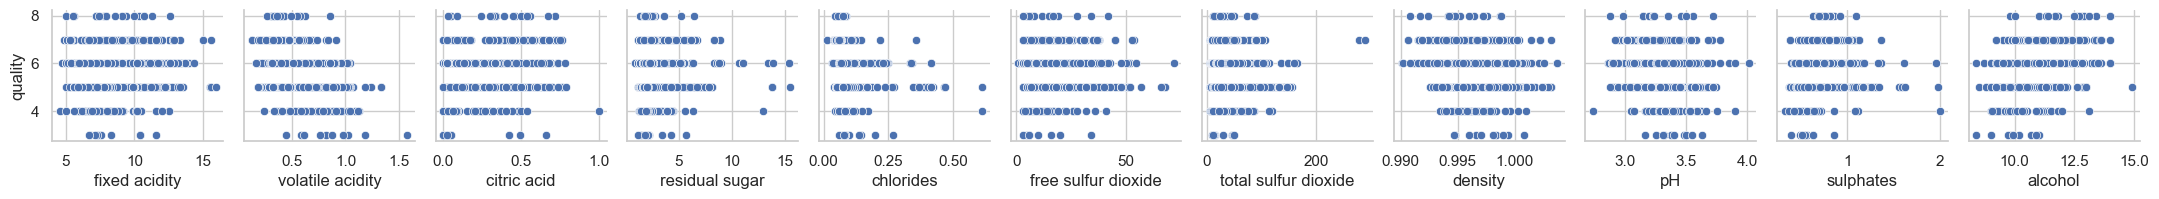

In [18]:
# quality as the target variable, the code plot the relationship between different features in your DataFrame and quality.

pair_plot = sns.pairplot(df, x_vars=df.columns[:-1], y_vars='quality', height=2)

# Save the figure with adjustable resolution (dpi)
plt.savefig("pair_plot.png", dpi=300) # Find attach for the adjusted resolution

# Show the plot
plt.show()


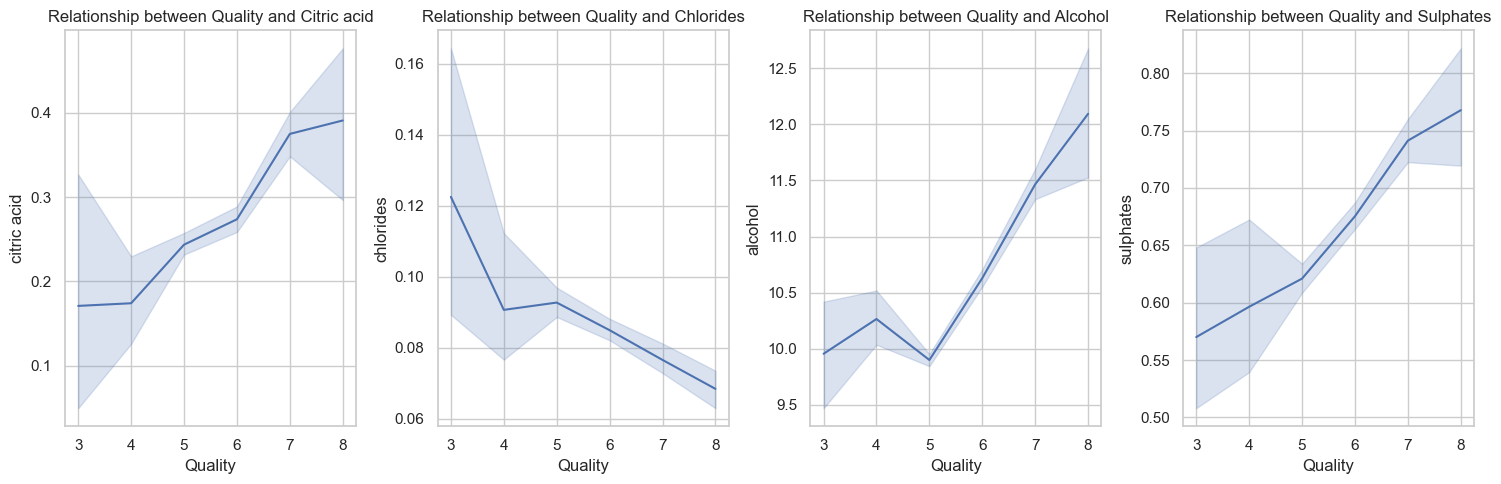

In [29]:
# Selecting specific columns for scatter plot
columns = ['citric acid', 'chlorides', 'alcohol','sulphates']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(10, 5))

# Create scatter plot for each column
for i, column in enumerate(columns):
    sns.lineplot(data=df, x='quality', y=column, ax=axes[i])
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'Relationship between Quality and {column.capitalize()}')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

The relationships between citric acid, alcohol, and sulphates with wine quality exhibit a positive trend, indicated by an upward slope from left
to right. This suggests that higher levels of these components in the wine positively impact its quality rating. Conversely, chlorides show 
an inverse relationship, implying that their presence has little to no effect on wine quality. Thus, the volume of citric acid, alcohol, 
and sulphates contributes significantly to the wine's rating, while chlorides have minimal influence.

Note: While there is a generally linear relationship between the mentioned variables and better quality ratings, it's important to recognize that 
correlation does not imply causation.

In [ ]:
FEATURE ENGINEERING 

In [34]:
#Checking Missing Data
df.isna().sum().sum()

0

In [35]:
# Noting the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Rows with outliers:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
9               7.5             0.500         0.36             6.1      0.071   
11              7.5             0.500         0.36             6.1      0.071   
13              7.8             0.610         0.29             1.6      0.114   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
...             ...               ...          ...             ...        ...   
1570            6.4             0.360         0.53             2.2      0.230   
1571            6.4             0.380         0.14             2.2      0.038   
1574            5.6             0.310         0.78            13.9      0.074   
1577            6.2             0.700         0.15             5.1      0.076   
1589            6.6             0.725         0.20             7.8      0.073   

      f

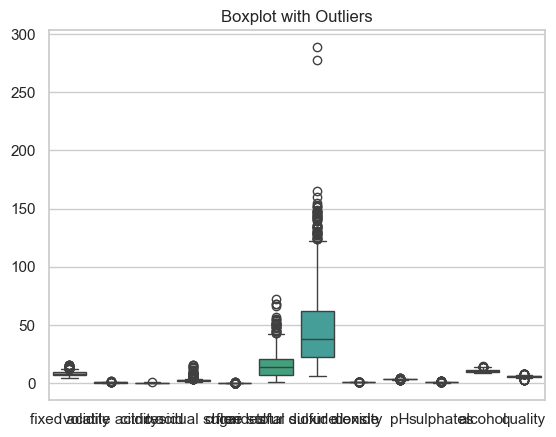

In [37]:
# Identify outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a condition to filter outliers
outlier_condition = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Display rows containing outliers
outliers = df[outlier_condition.any(axis=1)]
print("Rows with outliers:")
print(outliers)

# Visualize the outliers using a boxplot
sns.boxplot(data=df)
plt.title("Boxplot with Outliers")
plt.show()

Note 2
Addressing outliers is a important preprocessing step vital for enhancing predictive model performance and generalization. 
Specifically tailored to physicochemical data, replacing outliers with the median emerges as a pragmatic strategy. 
Physicochemical properties often have specific ranges, and this (outliers) may signify measurement errors or rare occurrences,
emphasizing the rationale behind this approach.

In [43]:
# Handling Outliers replace outliers with the median
df_imputed = df.copy()
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):
        median_val = df[column].median()
        df_imputed[column] = np.where(outlier_condition[column], median_val, df[column])


In [44]:
#Data with managed outliers
df_imputed


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [45]:
df_imputed.skew()

fixed acidity           0.614884
volatile acidity        0.289724
citric acid             0.296460
residual sugar          0.594367
chlorides               0.195170
free sulfur dioxide     0.795113
total sulfur dioxide    0.948918
density                 0.018562
pH                      0.030546
sulphates               0.612119
alcohol                 0.739513
quality                 0.215680
dtype: float64

Note 3
Density 0.018562:The skewness value is close to zero, suggesting a nearly symmetrical distribution. pH 0.030546: Similar to density, 
the skewness value is very close to zero, indicating a nearly symmetrical distribution apart from free sulfur dioxide and 
total sulfur dioxide

In [46]:
# Encode the categorical target variable 'quality' into binary classes based on this analysis cutoff of 7.
cutoff = 7
df_imputed['quality_binary'] = df_imputed['quality'].apply(lambda x: 1 if x >= cutoff else 0)
df_imputed.drop('quality', axis = 1, inplace = True)

In [47]:
# Display datatype
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality_binary        1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.258476     0.608682   
volatile acidity          -0.258476          1.000000    -0.564257   
citric acid                0.608682         -0.564257     1.000000   
residual sugar             0.225436          0.018550     0.156708   
chlorides                  0.227814          0.138565     0.091785   
free sulfur dioxide       -0.145813          0.004853    -0.060658   
total sulfur dioxide      -0.113789          0.090253    -0.010996   
density                    0.557213          0.000445     0.338521   
pH                        -0.596539          0.225681    -0.527095   
sulphates                  0.176282         -0.315552     0.277967   
alcohol                   -0.048917         -0.214283     0.129530   
quality_binary             0.109762         -0.265627     0.203523   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

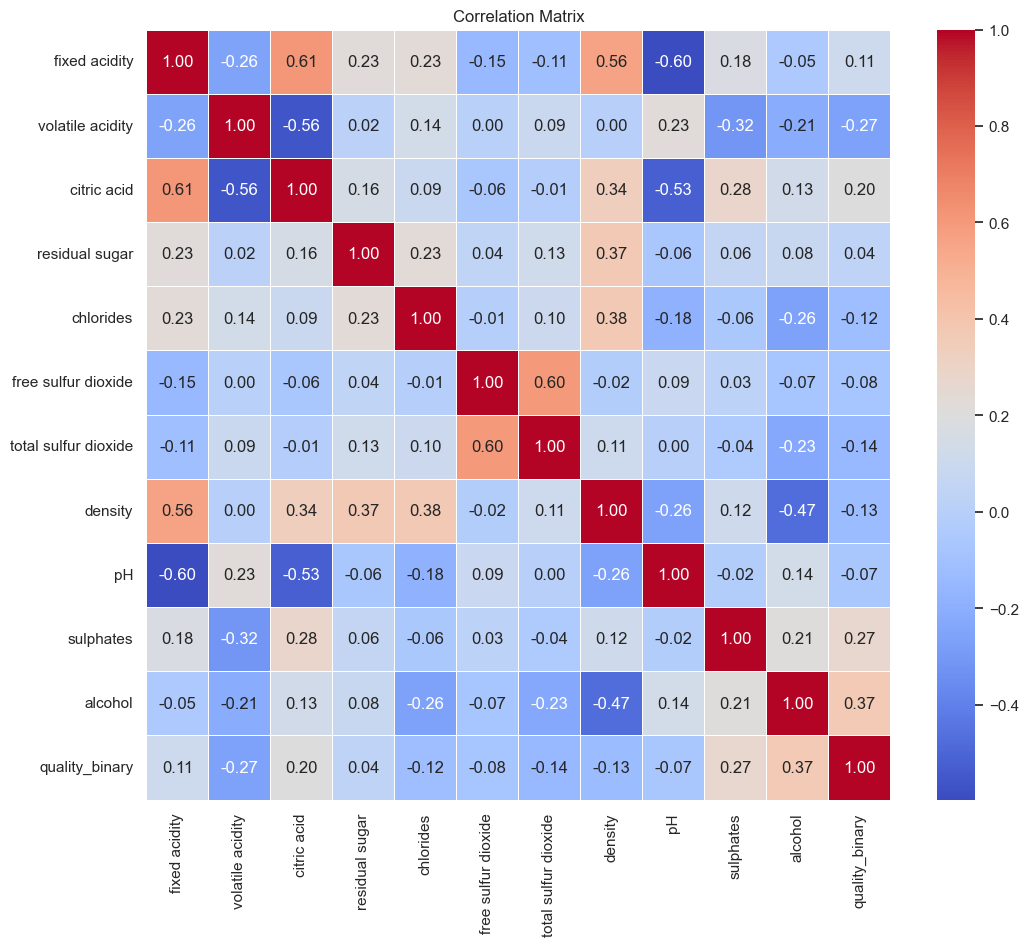

In [48]:
# Correlation Analysis for X is the DataFrame
correlation_matrix = df_imputed.corr()
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Note 4:
Based on these correlation coefficients, 'Citric Acid', 'Fixed Acidity', 'Density', 
'Sulphates', and 'Residual Sugar' appear to have relatively stronger 
correlations with 'quality'.

In [63]:
# Set the random seed
np.random.seed(42)

# Split the dataset into features (X) and the target variable (y) using feature selected 
X = df_imputed[['citric acid', 'fixed acidity', 'density', 'sulphates', 'residual sugar']]
y = df_imputed['quality_binary']#Target variable

# Standardize features 
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

In [64]:
y.value_counts()

quality_binary
0    1400
1     199
Name: count, dtype: int64

In [65]:
# Initialize SMOTE ( to address the class imbalance in the datasets.)
sm = SMOTE()

In [66]:
# The implementation of the fit_resample 
X,y = sm.fit_resample(X,y)

In [67]:
# Create a DataFrame to see the distribution of classes in the target vector y
data = pd.concat([X, y], axis=1)
class_distribution = data[y.name].value_counts()

print(class_distribution)


quality_binary
0    1400
1    1400
Name: count, dtype: int64


Note 5: 
The above code sets a random seed for reproducibility, selects specific features
('citric acid', 'fixed acidity', 'density', 'sulphates', 'residual sugar'), 
standardizes them, and splits the dataset into training and testing sets for
a binary classification task, preparing the data for a machine-learning model 
training and evaluation.

In [56]:
# Set the random seed
np.random.seed(42)

# Initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
logistic_regression = LogisticRegression()

# Train and evaluate each classifier
classifiers = [random_forest, gradient_boosting, logistic_regression]

for clf in classifiers:
    # Train the classifier
    clf.fit(X_train, y_train)

    # For RandomForestClassifier, print feature importances
    if isinstance(clf, RandomForestClassifier):
        feature_importances = clf.feature_importances_
        feature_names = X.columns  
        importance_dict = dict(zip(feature_names, feature_importances))
        print(f"RandomForestClassifier Feature Importances:\n{importance_dict}")
    

    
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print the results
    print(f"Classifier: {clf.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("="*50)


RandomForestClassifier Feature Importances:
{'citric acid': 0.2148210241794055, 'fixed acidity': 0.18928591404893708, 'density': 0.24362468646750954, 'sulphates': 0.21854597516481575, 'residual sugar': 0.13372240013933212}
Classifier: RandomForestClassifier
Accuracy: 0.8844
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       278
           1       0.59      0.40      0.48        42

    accuracy                           0.88       320
   macro avg       0.75      0.68      0.71       320
weighted avg       0.87      0.88      0.88       320

Classifier: GradientBoostingClassifier
Accuracy: 0.8656
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       278
           1       0.48      0.29      0.36        42

    accuracy                           0.87       320
   macro avg       0.69      0.62      0.64       320
weighted avg       0.8

Note 6:
The RandomForestClassifier achieved the highest accuracy (88.44%) among the models,
demonstrating better precision, recall, and F1-score for both classes. 
GradientBoostingClassifier follows with 86.56% accuracy, while LogisticRegression, 
though accurate (86.88%), struggles with precision and recall for the minority
class

RandomForestClassifier Feature Importances:
{'citric acid': 0.2148210241794055, 'fixed acidity': 0.18928591404893708, 'density': 0.24362468646750954, 'sulphates': 0.21854597516481575, 'residual sugar': 0.13372240013933212

Themodel  shows however tha: citric acid, fixed acidity, density, sulphates and residual sugar are the important features}

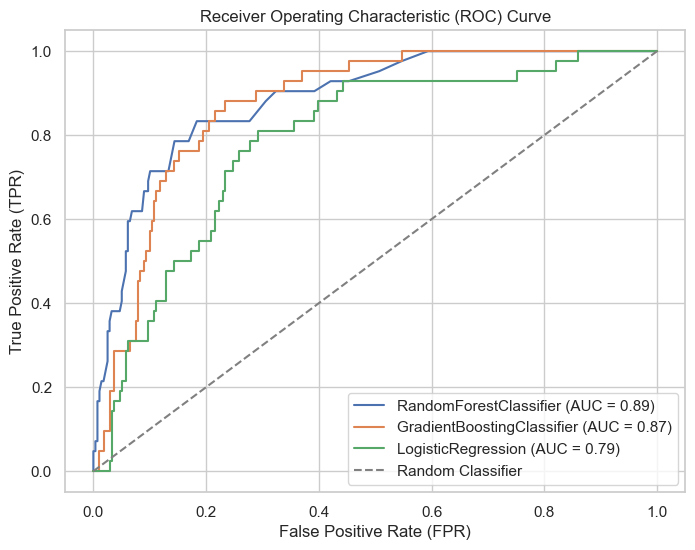

In [58]:
# Importing the neccessary library for the plot
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Plot ROC curve for each classifier
plt.figure(figsize=(8, 6))

for clf in classifiers:
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{clf.__class__.__name__} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier')

# Set plot details
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

The RandomForestClassifier outperformed other models with the highest accuracy (88.44%). The ROC curve visually illustrates its superior performance,
showcasing its ability to discriminate between classes seamlessly, particularly in predicting high-quality outcomes.

In [68]:

# Set the random seed
np.random.seed(42)

# Initialize classifiers with default parameters
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
logistic_regression = LogisticRegression()

# Define hyperparameter grids
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Define classifiers and corresponding hyperparameter grids
classifiers = [
    (random_forest, param_grid_rf),
    (gradient_boosting, param_grid_gb),
    (logistic_regression, param_grid_lr)
]

# Train and evaluate each classifier with hyperparameter tuning
for clf, param_grid in classifiers:
    grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best hyperparameters for the current classifier
    best_params = grid_search.best_params_

    # Train the classifier with the best hyperparameters
    best_clf = grid_search.best_estimator_
    best_clf.fit(X_train, y_train)

    # For RandomForestClassifier, print feature importances
    if isinstance(best_clf, RandomForestClassifier):
        feature_importances = best_clf.feature_importances_
        feature_names = X.columns
        importance_dict = dict(zip(feature_names, feature_importances))
        print(f"RandomForestClassifier Feature Importances:\n{importance_dict}")

    # Make predictions on the test set
    y_pred = best_clf.predict(X_test)

    # Evaluate the classifier with the best hyperparameters
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results
    print(f"Classifier: {best_clf.__class__.__name__}")
    print(f"Best Hyperparameters: {best_params}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("=" * 50)


RandomForestClassifier Feature Importances:
{'citric acid': 0.2152463150973505, 'fixed acidity': 0.1878819969243656, 'density': 0.24218888485608836, 'sulphates': 0.22310506334958158, 'residual sugar': 0.13157773977261403}
Classifier: RandomForestClassifier
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.8875
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       278
           1       0.61      0.40      0.49        42

    accuracy                           0.89       320
   macro avg       0.76      0.68      0.71       320
weighted avg       0.87      0.89      0.88       320

Classifier: GradientBoostingClassifier
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Accuracy: 0.8875
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       2

Note 
Conclusion
The model shows however that citric acid, fixed acidity, density, sulphates and residual sugar are the important features.
The hyperparameter tuning slightly enhances model performance by 
0.003.1.

Limitations
The Analyze learn and explores different algorithms. However, sometimes, the issue lies in the features rather than the model.  Outliers and skewed distributions can impact model performance. Lastliin most casess, having more data can significantly improve model performanc


